In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/herblinear2/herblinear.csv
/kaggle/input/herblinear3/herblinear.csv
/kaggle/input/mybacin/.csv
/kaggle/input/longzange/.csv
/kaggle/input/monthcontinue/Monthly_Provisional_Counts_of_Deaths_by_Select_Causes__2020-2022.csv
/kaggle/input/gmvass/GMvas.csv
/kaggle/input/gumgickpiang/.csv
/kaggle/input/herblinear4/herblinear.csv
/kaggle/input/causedeathus/Monthly_Provisional_Counts_of_Deaths_by_Select_Causes__2020-2022.csv
/kaggle/input/herblinear/herblinear.csv
/kaggle/input/vnvass/VNvas.csv
/kaggle/input/monthhh/Monthly_Provisional_Counts_of_Deaths_by_Select_Causes__2020-2022.csv
/kaggle/input/oversea-import-from-th/import_value1.csv
/kaggle/input/thvass/THvas.csv
/kaggle/input/cnvass/CNvas.csv
/kaggle/input/knndata/cardio_train.csv
/kaggle/input/jpvass/JPvas.csv
/kaggle/input/boonsongosot/.csv
/kaggle/input/usvass/USvas.csv
/kaggle/input/myvass/MYvas.csv


# **Linear Regression - Export Value**

MAE of Export Value using Linear Regression = 87.97141864434334


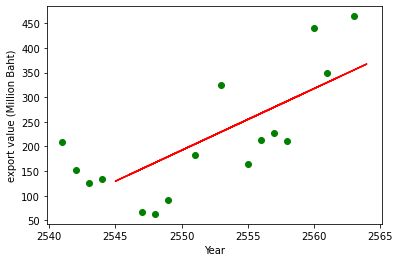

In [7]:
df_linear = pd.read_csv('/kaggle/input/herblinear4/herblinear.csv')
ex_year = np.array(df_linear['year']).reshape((-1, 1))
ex_ex = df_linear['export']
X_train, X_test, y_train, y_test = train_test_split(ex_year,ex_ex,test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_train, y_train,color='g') 
plt.xlabel('Year')
plt.ylabel('export value (Million Baht)')
plt.plot(X_test, y_pred,color='r')
print('MAE of Export Value using Linear Regression = '+str(mean_absolute_error(y_test, y_pred)))

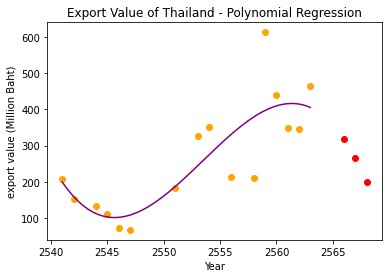

MAE of Export Value using Polynomial Regression = 65.18633897304535
MAPE of Export Value using Polynomial Regression = 62.16145691716193%


In [8]:
X_train, X_test, y_train, y_test = train_test_split(ex_year,ex_ex,test_size=0.3)

line_ex = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
model_ex = np.poly1d(np.polyfit(X_train.ravel(), y_train, 3))


polyreg_ex=make_pipeline(PolynomialFeatures(3),LinearRegression())
polyreg_ex.fit(X_train,y_train)
y_pred_ex = polyreg_ex.predict(X_test)



plt.figure()
plt.scatter(X_train,y_train, color='orange')
plt.plot(line_ex,model_ex(line_ex),color="purple")
plt.xlabel('Year')
plt.ylabel('export value (Million Baht)')
plt.title('Export Value of Thailand - Polynomial Regression')

df_pred_ex = pd.DataFrame({'Year' : [2566,2567,2568],'export':[polyreg_ex.predict([[2566]]),polyreg_ex.predict([[2567]]),
                                                               polyreg_ex.predict([[2568]])]})
plt.scatter(df_pred_ex['Year'], df_pred_ex['export'], color='red')

plt.show()
print('MAE of Export Value using Polynomial Regression = '+str(mean_absolute_error(y_test, y_pred_ex)))
print('MAPE of Export Value using Polynomial Regression = '+str((mean_absolute_percentage_error(y_test, y_pred_ex))*100)+'%')

# USvas

**US - Linear(Underfitting)**

Text(0.5, 1.0, 'Cardiovascular disease of US - Linear Regression')

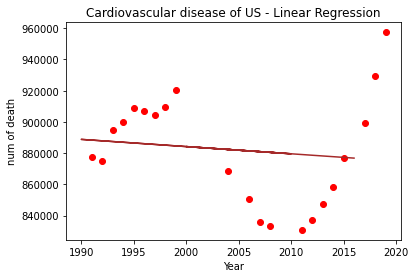

In [9]:
df_us = pd.read_csv('/kaggle/input/usvass/USvas.csv')
year_us = np.array(df_us['Year']).reshape((-1, 1))
num_heart_us = np.array(df_us['Death Numbers'])
X_train, X_test, y_train, y_test = train_test_split(year_us,num_heart_us,test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_train, y_train,color='red') 
plt.xlabel('Year')
plt.ylabel('num of death')
plt.plot(X_test, y_pred,color='brown')
plt.title('Cardiovascular disease of US - Linear Regression')

**US - polynomial**

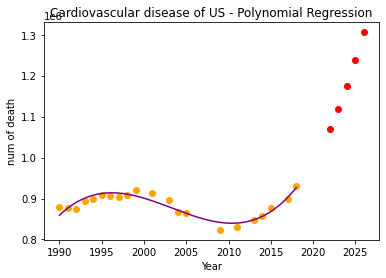

In [10]:
X_train, X_test, y_train, y_test = train_test_split(year_us,num_heart_us,test_size=0.3)

line_us = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
model_us = np.poly1d(np.polyfit(X_train.ravel(), y_train, 3))

polyreg_us=make_pipeline(PolynomialFeatures(3),LinearRegression())
polyreg_us.fit(X_train,y_train)
y_pred_us = polyreg_us.predict(X_test)



plt.figure()
plt.scatter(X_train,y_train, color='orange')
plt.plot(line_us,model_us(line_us),color="purple")
plt.xlabel('Year')
plt.ylabel('num of death')
plt.title('Cardiovascular disease of US - Polynomial Regression')

df_pred_us = pd.DataFrame({'Year' : [2022,2023,2024,2025,2026],'export':[polyreg_us.predict([[2022]]),polyreg_us.predict([[2023]]),
                                                               polyreg_us.predict([[2024]]),polyreg_us.predict([[2025]]),
                                                                polyreg_us.predict([[2026]])]})
plt.scatter(df_pred_us['Year'], df_pred_us['export'], color='red')

plt.show()

In [11]:
print('MAE of Cardiovascular disease of US = '+str((mean_absolute_error(y_test, y_pred_us))))
print('MAPE of Cardiovascular disease of US using Polynomial Regression = '+str((mean_absolute_percentage_error(y_test, y_pred_us))*100)+' %')

MAE of Cardiovascular disease of US = 12095.040398491754
MAPE of Cardiovascular disease of US using Polynomial Regression = 1.394412158049101 %


# China cardiovascular disease

**CN - Linear**

Text(0.5, 1.0, 'Cardiovascular disease of China - Linear Regression')

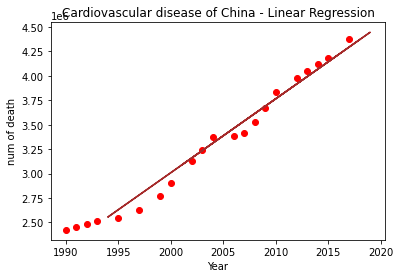

In [12]:
df_cn = pd.read_csv('/kaggle/input/cnvass/CNvas.csv')
year_cn = np.array(df_cn['Year']).reshape((-1, 1))
num_heart_cn = np.array(df_cn['Death Numbers'])
X_train, X_test, y_train, y_test = train_test_split(year_cn,num_heart_cn,test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.xlabel('Year')
plt.ylabel('num of death')
plt.scatter(X_train, y_train,color='red') 
plt.plot(X_test, y_pred,color='brown')
plt.title('Cardiovascular disease of China - Linear Regression')

**CN - Polynomial**

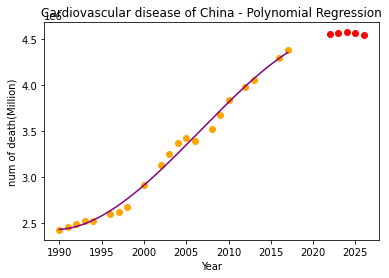

In [13]:
X_train, X_test, y_train, y_test = train_test_split(year_cn,num_heart_cn,test_size=0.3)

line_cn = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
model_cn = np.poly1d(np.polyfit(X_train.ravel(), y_train, 3))

polyreg_cn=make_pipeline(PolynomialFeatures(3),LinearRegression())
polyreg_cn.fit(X_train,y_train)
y_pred_cn = polyreg_cn.predict(X_test)


plt.figure()
plt.scatter(X_train,y_train, color='orange')
plt.plot(line_cn,model_cn(line_cn),color="purple")
plt.xlabel('Year')
plt.ylabel('num of death(Million)')
plt.title('Cardiovascular disease of China - Polynomial Regression')

df_pred_cn = pd.DataFrame({'Year' : [2022,2023,2024,2025,2026],'export':[polyreg_cn.predict([[2022]]),polyreg_cn.predict([[2023]]),
                                                               polyreg_cn.predict([[2024]]),polyreg_cn.predict([[2025]]),
                                                                polyreg_cn.predict([[2026]])]})
plt.scatter(df_pred_cn['Year'], df_pred_cn['export'], color='red')

plt.show()

In [14]:
print('MAE of Cardiovascular disease of China = '+str((mean_absolute_error(y_test, y_pred_cn))))
print('MAPE of Cardiovascular disease of China using Polynomial Regression = '+str((mean_absolute_percentage_error(y_test, y_pred_cn))*100)+' %')

MAE of Cardiovascular disease of China = 57578.759250217016
MAPE of Cardiovascular disease of China using Polynomial Regression = 1.576490323902844 %


# Vietnam cardiovascular disease

**VN - Linear**

Text(0.5, 1.0, 'Cardiovascular disease of Vietnam - Linear Regression')

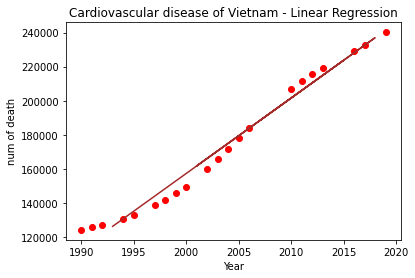

In [15]:
df_vn = pd.read_csv('/kaggle/input/vnvass/VNvas.csv')
year_vn = np.array(df_vn['Year']).reshape((-1, 1))
num_heart_vn = np.array(df_vn['Death Numbers'])
X_train, X_test, y_train, y_test = train_test_split(year_vn,num_heart_vn,test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.xlabel('Year')
plt.ylabel('num of death')
plt.scatter(X_train, y_train,color='red') 
plt.plot(X_test, y_pred,color='brown')
plt.title('Cardiovascular disease of Vietnam - Linear Regression')

**VN - Polynomial**

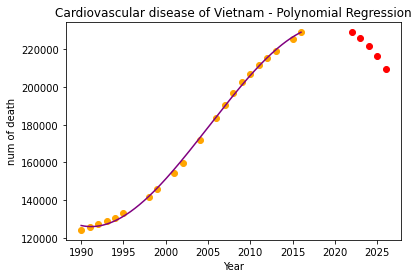

In [16]:
X_train, X_test, y_train, y_test = train_test_split(year_vn,num_heart_vn,test_size=0.3)

line_vn = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
model_vn = np.poly1d(np.polyfit(X_train.ravel(), y_train, 3))


polyreg_vn=make_pipeline(PolynomialFeatures(3),LinearRegression())
polyreg_vn.fit(X_train,y_train)
y_pred_vn = polyreg_vn.predict(X_test)

plt.figure()
plt.scatter(X_train,y_train, color='orange')
plt.plot(line_vn,model_vn(line_vn),color="purple")
plt.xlabel('Year')
plt.ylabel('num of death')
plt.title('Cardiovascular disease of Vietnam - Polynomial Regression')

df_pred_vn = pd.DataFrame({'Year' : [2022,2023,2024,2025,2026],'export':[polyreg_vn.predict([[2022]]),polyreg_vn.predict([[2023]]),
                                                               polyreg_vn.predict([[2024]]),polyreg_vn.predict([[2025]]),
                                                                polyreg_vn.predict([[2026]])]})
plt.scatter(df_pred_vn['Year'], df_pred_vn['export'], color='red')

plt.show()

In [17]:
print('MAE of Cardiovascular disease of Vietnam = '+str((mean_absolute_error(y_test, y_pred_vn))))
print('MAPE of Cardiovascular disease of Vietnam using Polynomial Regression = '+str((mean_absolute_percentage_error(y_test, y_pred_vn))*100)+' %')

MAE of Cardiovascular disease of Vietnam = 2198.415305243598
MAPE of Cardiovascular disease of Vietnam using Polynomial Regression = 1.0793119824538084 %


# Japan cardiovascular disease

**JP - Linear(Undefitting)**

Text(0.5, 1.0, 'Cardiovascular disease of Japan - Linear Regression')

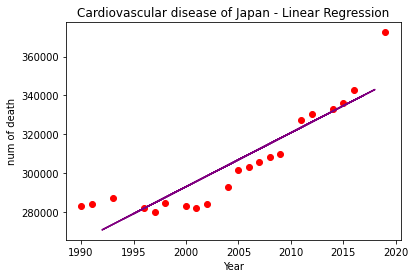

In [18]:
df_jp = pd.read_csv('/kaggle/input/jpvass/JPvas.csv')
year_jp = np.array(df_jp['Year']).reshape((-1, 1))
num_heart_jp = np.array(df_jp['Death Numbers'])
X_train, X_test, y_train, y_test = train_test_split(year_jp,num_heart_jp,test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.xlabel('Year')
plt.ylabel('num of death')
plt.scatter(X_train, y_train,color='red') 
plt.plot(X_test, y_pred,color='purple')
plt.title('Cardiovascular disease of Japan - Linear Regression')

**JP - Polynomial**

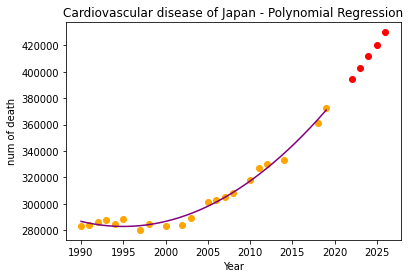

In [19]:
X_train, X_test, y_train, y_test = train_test_split(year_jp,num_heart_jp,test_size=0.3)

line_jp = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
model_jp = np.poly1d(np.polyfit(X_train.ravel(), y_train, 2))


polyreg_jp=make_pipeline(PolynomialFeatures(2),LinearRegression())
polyreg_jp.fit(X_train,y_train)
y_pred_jp = polyreg_jp.predict(X_test)


plt.figure()
plt.scatter(X_train,y_train, color='orange')
plt.plot(line_jp,model_jp(line_jp),color="purple")
plt.xlabel('Year')
plt.ylabel('num of death')
plt.title('Cardiovascular disease of Japan - Polynomial Regression')

df_pred_jp = pd.DataFrame({'Year' : [2022,2023,2024,2025,2026],'export':[polyreg_jp.predict([[2022]]),polyreg_jp.predict([[2023]]),
                                                               polyreg_jp.predict([[2024]]),polyreg_jp.predict([[2025]]),
                                                                polyreg_jp.predict([[2026]])]})
plt.scatter(df_pred_jp['Year'], df_pred_jp['export'], color='red')

plt.show()

In [20]:
print('MAE of Cardiovascular disease of Japan = '+str((mean_absolute_error(y_test, y_pred_jp))))
print('MAPE of Cardiovascular disease of Japan using Polynomial Regression = '+str((mean_absolute_percentage_error(y_test, y_pred_jp))*100)+' %')

MAE of Cardiovascular disease of Japan = 4277.149662680096
MAPE of Cardiovascular disease of Japan using Polynomial Regression = 1.335993619566413 %


# Malaysia Cardiovsacular disease

**MY - Linear**

Text(0.5, 1.0, 'Cardiovascular disease of Malaysia - Linear Regression')

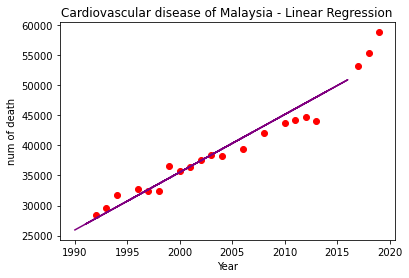

In [21]:
df_my = pd.read_csv('/kaggle/input/myvass/MYvas.csv')
year_my = np.array(df_my['Year']).reshape((-1, 1))
num_heart_my = np.array(df_my['Death Numbers'])
X_train, X_test, y_train, y_test = train_test_split(year_my,num_heart_my,test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.xlabel('Year')
plt.ylabel('num of death')
plt.scatter(X_train, y_train,color='red') 
plt.plot(X_test, y_pred,color='purple')
plt.title('Cardiovascular disease of Malaysia - Linear Regression')

**MY - Polynomial**

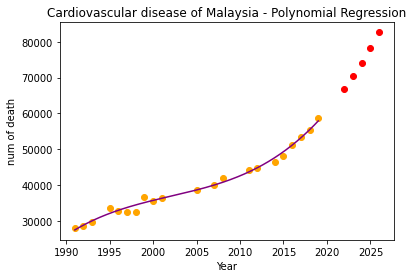

In [22]:
X_train, X_test, y_train, y_test = train_test_split(year_my,num_heart_my,test_size=0.3)

line_my = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
model_my = np.poly1d(np.polyfit(X_train.ravel(), y_train, 3))


polyreg_my=make_pipeline(PolynomialFeatures(3),LinearRegression())
polyreg_my.fit(X_train,y_train)
y_pred_my = polyreg_my.predict(X_test)


plt.figure()
plt.scatter(X_train,y_train, color='orange')
plt.plot(line_my,model_my(line_my),color="purple")
plt.xlabel('Year')
plt.ylabel('num of death')
plt.title('Cardiovascular disease of Malaysia - Polynomial Regression')

df_pred_my = pd.DataFrame({'Year' : [2022,2023,2024,2025,2026],'export':[polyreg_my.predict([[2022]]),polyreg_my.predict([[2023]]),
                                                               polyreg_my.predict([[2024]]),polyreg_my.predict([[2025]]),
                                                                polyreg_my.predict([[2026]])]})
plt.scatter(df_pred_my['Year'], df_pred_my['export'], color='red')

plt.show()

# Overseas import herb from Thailand

**Overseas import - Linear**

Text(0.5, 1.0, 'Overseas import herb from Thailand - Linear Regression')

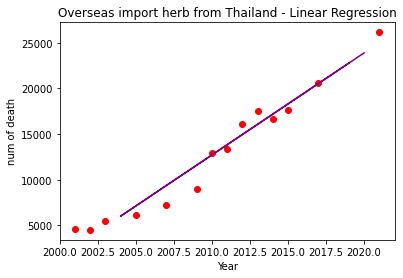

In [23]:
df_herb = pd.read_csv('/kaggle/input/oversea-import-from-th/import_value1.csv') #Unit = $dollars
df_herb
year_ovs = np.array(df_herb['Year']).reshape((-1, 1))
ovs_import = np.array(df_herb['import value'])
X_train, X_test, y_train, y_test = train_test_split(year_ovs,ovs_import,test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_ovs = model.predict(X_test)
plt.xlabel('Year')
plt.ylabel('num of death')
plt.scatter(X_train, y_train,color='red') 
plt.plot(X_test, y_pred_ovs,color='purple')
plt.title('Overseas import herb from Thailand - Linear Regression')

**Overseas import - Polynomial**

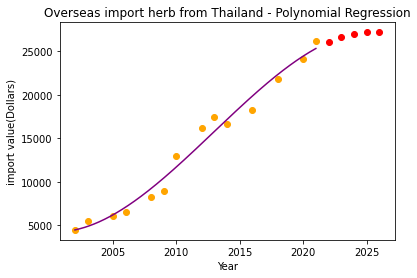

In [24]:
X_train, X_test, y_train, y_test = train_test_split(year_ovs,ovs_import,test_size=0.3)

line_ovs = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
model_ovs = np.poly1d(np.polyfit(X_train.ravel(), y_train, 3))


polyreg_ovs=make_pipeline(PolynomialFeatures(3),LinearRegression())
polyreg_ovs.fit(X_train,y_train)
y_pred_ovs = polyreg_ovs.predict(X_test)


plt.figure()
plt.scatter(X_train,y_train, color='orange')
plt.plot(line_ovs,model_ovs(line_ovs),color="purple")
plt.xlabel('Year')
plt.ylabel('import value(Dollars)')
plt.title('Overseas import herb from Thailand - Polynomial Regression')

df_pred_ovs = pd.DataFrame({'Year' : [2022,2023,2024,2025,2026],'export':[polyreg_ovs.predict([[2022]]),polyreg_ovs.predict([[2023]]),
                                                               polyreg_ovs.predict([[2024]]),polyreg_ovs.predict([[2025]]),
                                                                polyreg_ovs.predict([[2026]])]})
plt.scatter(df_pred_ovs['Year'], df_pred_ovs['export'], color='red')
plt.show()

In [25]:
print('MAE of Overseas import herb from Thailand = '+str((mean_absolute_error(y_test, y_pred_ovs))))
print('MAPE of Overseas import herb from Thailand using Polynomial Regression = '+str((mean_absolute_percentage_error(y_test, y_pred_ovs))*100)+' %')

MAE of Overseas import herb from Thailand = 692.5078402927944
MAPE of Overseas import herb from Thailand using Polynomial Regression = 6.4118199445278234 %
